In [1]:
pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from Bio import SeqIO
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
neg_seq = []
neg_id= []

for seq_record in SeqIO.parse("/content/drive/MyDrive/Briefings in Bioinformatics/Sequence/Sequence2/neg_train_main.fasta", "fasta"):
    neg_seq.append(str(seq_record.seq))
    neg_id.append(str(seq_record.id))
pos_seq = []
pos_id= []

for seq_record in SeqIO.parse("/content/drive/MyDrive/Briefings in Bioinformatics/Sequence/Sequence2/pos_train_main.fasta", "fasta"):
    pos_seq.append(str(seq_record.seq))
    pos_id.append(str(seq_record.id))
seqs=pos_seq + neg_seq
dfclass = pd.DataFrame({'class' :  np.repeat((1,0), (689, 689))})
y=dfclass['class']
print(seqs)

['FAKKFAKKFKKFAKKFAKFAFAF', 'ICLRLPGC', 'FLGSIVGALASALPSLISKIRN', 'FGLPMLSILPKALCILLKRKC', 'CGESCVWIPCVTSIFNCKCKENKVCYHDKIP', 'KLAKLAK', 'GLFDIVKKVVGAIGSL', 'AKRHHGYKRKFH', 'FMPILSCSRFKRC', 'GRKKRRQRRRGGWMWVTNLRTD', 'GIGKFLKKAKKFAKAFVKMNN', 'GIGKFLKKAKKFAKAFVKIINN', 'GLMDTIKGVAKTVAASWLDKLKCKITGC', 'LLRHVVKILSKYL', 'KFKKLAKKF', 'TILLEIKNINAD', 'GLFKVIKKVAKVIKKL', 'FIFHIIKGLFHAGKMIHGLVTRRRH', 'ALYKKFKKKLLKSLKRL', 'TFRAFLSSRLQDLYSIVRRADRAAV', 'AVPDVAFNAYG', 'MRKEFHNVLSSGQLLADKRPARDYNRK', 'YAIDTILAEIKNINA', 'GKWLSLLKHILK', 'FVKLKKILNIILSIFKK', 'GFLGPLLKLAAKGVAKVIPHLIPSRQQ', 'DTHFPICIFCCGCCHRSKCGMCCKT', 'HGVSGHGQHGVHG', 'CKQSCSFGPFTFVCDGNTK', 'GKWMSLLKHILK', 'KWKLFKKIPKFLHL', 'KWKLFKKIGIGAVLKVLKKG', 'FALKALKK', 'FLPVVAGLAAKVLPSIICAVTKKC', 'CGETCVGGTCNTPGCTCSWPVCTRNGLPV', 'AIKLVQSPNGNFAASFVLDGTKWIFKSKYYDSSKGYWVGIYEVWDRK', 'KSCCPNTTGRNIYNTCRLGGGSRERCASLSGCKIISASTCPSDYPK', 'LKCNKLVPLFYKTCPAGKNL', 'KWFKKIPKFLHLAKKF', 'CGESCAMISFCFTEVIGCSCKNKVCYLNSIS', 'FAKLLAKFLKKAL', 'ETWRTEAPSATGQASSLLGGRLLGQ

In [5]:
Indneg_seq = []
Indneg_id= []

for Indseq_record in SeqIO.parse("/content/drive/MyDrive/Briefings in Bioinformatics/Sequence/Sequence2/neg_test_main.fasta", "fasta"):
    Indneg_seq.append(str(Indseq_record.seq))
    Indneg_id.append(str(Indseq_record.id))
Indpos_seq = []
Indpos_id= []

for Indseq_record in SeqIO.parse("/content/drive/MyDrive/Briefings in Bioinformatics/Sequence/Sequence2/pos_test_main.fasta", "fasta"):
    Indpos_seq.append(str(Indseq_record.seq))
    Indpos_id.append(str(Indseq_record.id))

Indseqs=Indpos_seq + Indneg_seq
Inddfclass = pd.DataFrame({'class' :  np.repeat((1,0), (172, 172))})
z=Inddfclass['class']
print(Indseqs)

['FLWWLFKWAWK', 'FAKLAKKALAKLL', 'GLFDIVKKIAGHIAGSI', 'VNFKKLLGKLLKVVK', 'WKKIPKFLHLLKKF', 'EQCGRQAGGKLCPNNLCCSQYGWCGSSDDYCSPSKNCQSNCKGGG', 'EADEPLWLYKGDNIERAPTTADHPILPSIIDDVKLDPNRRYA', 'FVGLAKVAAHVVPAIAEHF', 'FAKLLAKLAKKFAL', 'ARSYGNGVYCNNKKCWVNRGEATQSIIGGMISGWASGLAGM', 'KWKLFKKIGIGAFLHSAKKF', 'GIGKFLHSAKKWGKAFVGQIMNC', 'PAWRKAFRWAWRMLKKAA', 'FAKLLAKALKKLL', 'AIGKFLHSAKKFGKAFVGEIMNS', 'KRFKQDGGWSHWSPWSSC', 'FLPIALKALGSIFPKIL', 'TESYFVFSVGM', 'CLGIGSCNDFAGCGYAVVCFW', 'GMWSKILGHLIK', 'GFGALFKFLAKKVAKTVAKQAAKQGAKYVVNKQME', 'GMWSKILGHLKR', 'FKCRRWQWRMKKLGAPSITCVR', 'KWKLFKKIGIGAFLHLAKKF', 'CGESCVWIPCISAAIGCSCKNKVCYRAIP', 'KWKSFAKTFKSAKKTVAHTALKAISS', 'KSCCPNTTGRNIYNTCRFGGGSREVCARISGCKIISASTCPSDYPK', 'GKFMSLLKHILK', 'FAKKLKKLAKKL', 'FAKLLAKLAKKSL', 'FLPIIAKVLSGLL', 'ITCPQVTQSLAPCVPYLISG', 'FAKLLAKLAKKIL', 'FAKKLAKKLAKAAL', 'FAKLLAKLAKKAA', 'FLGWLFKWASK', 'GIGAVLKVLTTGLPALISWIKRKRQQ', 'FNRGGYNFGKSVRHVVDAIGSVAGILKSIR', 'GVPCGESCVFIPCITGVIGCSCSSNVCYLN', 'FFPVIGRILNGIL', 'KMWSKILGHLIR', 'FALAL

In [6]:
pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import keras_tuner as kt

In [8]:
max_words = 5000
max_len = 350
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(seqs)
sequences = tok.texts_to_sequences(seqs)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [9]:
#Independent Testing
max_words = 5000
max_len = 350
indtok = Tokenizer(num_words=max_words)
indtok.fit_on_texts(Indseqs)
Indsequences = indtok.texts_to_sequences(Indseqs)
Indsequences_matrix = sequence.pad_sequences(Indsequences,maxlen=max_len)
X_train=sequences_matrix
y_train=y
X_test=Indsequences_matrix
y_test=z

In [10]:
import keras_tuner as kt
from tensorflow import keras

In [11]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(hp.Choice('units', [2, 4, 8, 16, 32, 64, 128]),activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',metrics=['accuracy']) 
  return model

In [12]:
tuner1 = kt.RandomSearch(
    build_model,
    overwrite=True,
    objective='val_accuracy',
    max_trials=10)

In [13]:
tuner1.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
best_model = tuner1.get_best_models()[0]

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.9389534592628479

Best val_accuracy So Far: 0.9912790656089783
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit


In [14]:
tuner1.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 32
Score: 0.9912790656089783
Trial summary
Hyperparameters:
units: 64
Score: 0.9883720874786377
Trial summary
Hyperparameters:
units: 8
Score: 0.9767441749572754
Trial summary
Hyperparameters:
units: 128
Score: 0.9389534592628479
Trial summary
Hyperparameters:
units: 2
Score: 0.5


In [15]:
best_model.build(X_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1378, 32)                11232     
                                                                 
 dense_1 (Dense)             (1378, 1)                 33        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [16]:
accr = best_model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

11/11 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.9913
Test set
  Loss: 0.348
  Accuracy: 0.991


In [17]:
pred=best_model.predict(X_test)
pred1 = np.round_(pred)

from sklearn.metrics import matthews_corrcoef as mcc
mc=mcc(y_test, pred1)
print("MCC: ",mc)
from sklearn.metrics import confusion_matrix as cm
cm(y_test, pred1)

MCC:  0.9827076298239907


array([[172,   0],
       [  3, 169]])

In [18]:
from sklearn.metrics import matthews_corrcoef as mcc
mc=mcc(y_test, pred1)
print("MCC: ",mc)
from sklearn.metrics import confusion_matrix as cm
cm(y_test, pred1)
print(classification_report(y_test, pred1))
tp, fn, fp, tn = confusion_matrix(y_test, pred1).ravel()
print("MCC ---> {0}".format(mc))
print("Confusion Matrix. tn, fp, fn, tp ---> ", tp, fn, fp, tn)
print("Precision --->TP/TP+Fp ", tp/(tp+fp))
print("Recall - SN - Sensitivity --->TP/TP+FN ", tp/(tp+fn))
print("Specificity - SP ---> ", tn/(tn+fp))
print("Balanced Accuracy ---> ", ((tp/(tp+fn))+(tn/(tn+fp)))/2)
print("Jaccard Index --->TP/TP+FN+FP ", tp/(tp+fn+fp))

MCC:  0.9827076298239907
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       172
           1       1.00      0.98      0.99       172

    accuracy                           0.99       344
   macro avg       0.99      0.99      0.99       344
weighted avg       0.99      0.99      0.99       344

MCC ---> 0.9827076298239907
Confusion Matrix. tn, fp, fn, tp --->  172 0 3 169
Precision --->TP/TP+Fp  0.9828571428571429
Recall - SN - Sensitivity --->TP/TP+FN  1.0
Specificity - SP --->  0.9825581395348837
Balanced Accuracy --->  0.9912790697674418
Jaccard Index --->TP/TP+FN+FP  0.9828571428571429


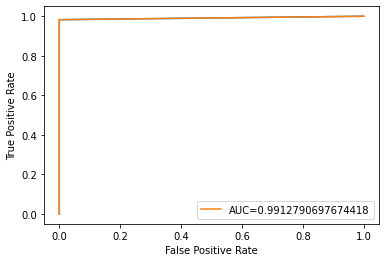

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fpr, tpr, _ = metrics.roc_curve(y_test, pred1)
auc = metrics.roc_auc_score(y_test, pred1)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()